In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
import seaborn as sns
from matplotlib.colors import ListedColormap

In [164]:
#call data frame City_csv

city_csv = pd.read_csv("/Users/RoFo/Dropbox/Data_Science_BC/GitHub/Git_Real_Repo/02-Homework/05-MatPlotLib/Instructions/Pyber/raw_data/city_data.csv")
ride_csv = pd.read_csv("/Users/RoFo/Dropbox/Data_Science_BC/GitHub/Git_Real_Repo/02-Homework/05-MatPlotLib/Instructions/Pyber/raw_data/ride_data.csv")

In [212]:
# inner merge -- I still don't understand inner and outer merge 
#? I can't find where my clean city dat came from.  Know I did it, though. 
uber_master = pd.merge(city_data_clean, ride_csv, on ='city')
uber_master.head()

,city,driver_count,type,date,fare,ride_id
0,Alvarezhaven,21,Urban,2016-04-18 20:51:29,31.93,4267015736324
1,Alvarezhaven,21,Urban,2016-08-01 00:39:48,6.42,8394540350728
2,Alvarezhaven,21,Urban,2016-09-01 22:57:12,18.09,1197329964911
3,Alvarezhaven,21,Urban,2016-08-18 07:12:06,20.74,357421158941
4,Alvarezhaven,21,Urban,2016-04-04 23:45:50,14.25,6431434271355


In [320]:
all_types = uber_master.groupby('type').sum()
all_types

,driver_count,fare,ride_id
type,,,
Rural,727,4255.09,658729360193746
Suburban,9730,19317.88,3006404300903080
Urban,64501,40078.34,7890194186030600


In [321]:
all_types['fare'].sum()

63651.31

In [318]:
(40078.34/63651.31)*100


62.965459783938456

In [ ]:
fare_play = 

In [166]:
mean_uber = (uber_master.groupby(['city', 'fare'], as_index=False).mean()
            .groupby('city')['fare'].mean())

In [273]:
#total number rides per city
rides_per_city = (uber_master.groupby(['city', 'ride_id'], as_index=False).mean()
            .groupby('city')['ride_id'].count())  

In [274]:
#total number of drivers per city
drivers_count = (uber_master.groupby(['city', 'driver_count'], as_index=False).mean()
            .groupby('city')['driver_count'].mean())

In [291]:
#city type
#? this is so much cleaner than my groupbys; can I switch the other ones to this format?
uber_master.groupby(['city']).first()['type'].head()

city
Alvarezhaven       Urban
Alyssaberg         Urban
Anitamouth      Suburban
Antoniomouth       Urban
Aprilchester       Urban
Name: type, dtype: object

In [43]:
#data frame -- this is a dictionary, which is being used to create the df

city_metrics = pd.DataFrame({'Av. Fare': mean_uber, 
                         'City Type': city_type, 
                         'Total Drivers': drivers_count, 
                         'Rides Per City': rides_per_city})
city_metrics.head()

,Av. Fare,City Type,Rides Per City,Total Drivers
city,,,,
Alvarezhaven,23.928710,Urban,31,21
Alyssaberg,20.609615,Urban,26,67
Anitamouth,37.315556,Suburban,9,16
Antoniomouth,23.801905,Urban,22,21
Aprilchester,21.981579,Urban,19,49


In [93]:
#?setup graph -- is there an easier way to do this?  Seems overly tedious for Pandas and I don't really understand the notation. 
#is this an array?  A Dictionary?

x_rural = city_metrics[city_metrics ["City Type"]=="Rural"]['Rides Per City']
x_urban = city_metrics[city_metrics ["City Type"]=="Urban"]['Rides Per City']
x_suburban = city_metrics[city_metrics ["City Type"]=="Suburban"]['Rides Per City']
y_rural = city_metrics[city_metrics ["City Type"]=="Rural"]['Av. Fare']
y_urban = city_metrics[city_metrics ["City Type"]=="Urban"]['Av. Fare']
y_suburban = city_metrics[city_metrics ["City Type"]=="Suburban"]['Av. Fare']
s_rural = city_metrics[city_metrics ["City Type"]=="Rural"]['Total Drivers']
s_urban = city_metrics[city_metrics ["City Type"]=="Urban"]['Total Drivers']
s_suburban = city_metrics[city_metrics ["City Type"]=="Suburban"]['Total Drivers']

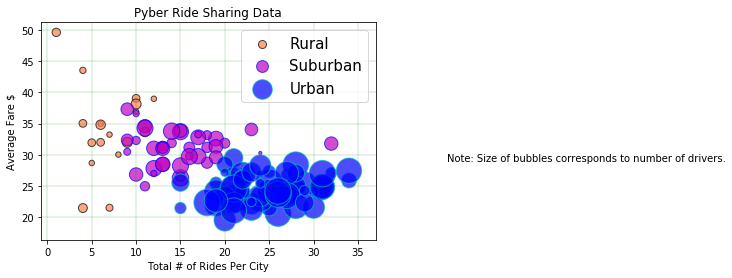

In [292]:
# Create a title, x label, and y label for our chart
#? how do you make it bigger?

plt.title("Pyber Ride Sharing Data")
plt.xlabel("Total # of Rides Per City")
plt.ylabel("Average Fare $")

#plot 
plt.scatter(x_rural, y_rural, facecolors="coral", edgecolors="black",s=s_rural * 10, label='Rural', alpha=0.7)
plt.scatter(x_suburban, y_suburban, facecolors="m", edgecolors="b",s=s_suburban * 10, label='Suburban', alpha=0.7)
plt.scatter(x_urban, y_urban, facecolors="blue", edgecolors="c",s=s_urban * 10, label='Urban', alpha=0.7)
plt.text(45, 29, 'Note: Size of bubbles corresponds to number of drivers.')
plt.grid(color='g', linestyle='-', linewidth=.2)
# make it legendary
plt.legend(loc=1,ncol=1, prop={'size':15})

<function matplotlib.pyplot.show>

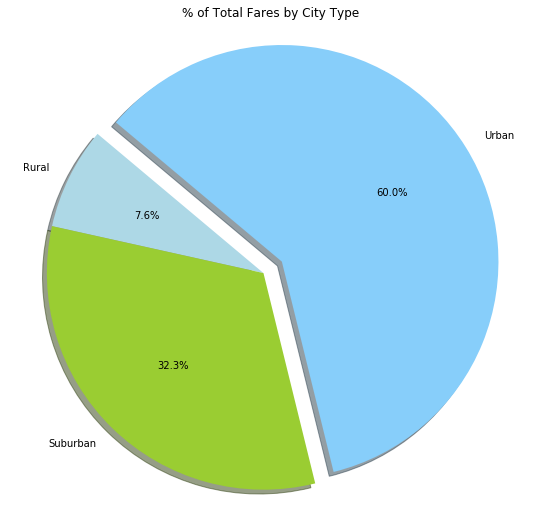

In [307]:
# Pie Chart % of Total Fares by City Type 
#how do you get "fare" out of the y axis?

#need to determine the sum of all fares

total_fares = (uber_master.groupby(['type', 'fare'], as_index=False).sum()
            .groupby('type')['fare'].sum())

explode = (0, 0, 0.1)
colors = ["lightblue","yellowgreen","lightskyblue"]

pie_chart1 = total_fares.plot(y="City Type", kind='pie', explode=explode, colors=colors, figsize=(9,9), autopct="%1.1f%%", shadow=True, startangle=140, title ="% of Total Fares by City Type ")

pie_chart1.set_ylabel(" ")
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt. show

In [310]:
total_fares = (uber_master.groupby(['type', 'fare']))
print(total_fares.sum())



KeyError: 'City Type'

<function matplotlib.pyplot.show>

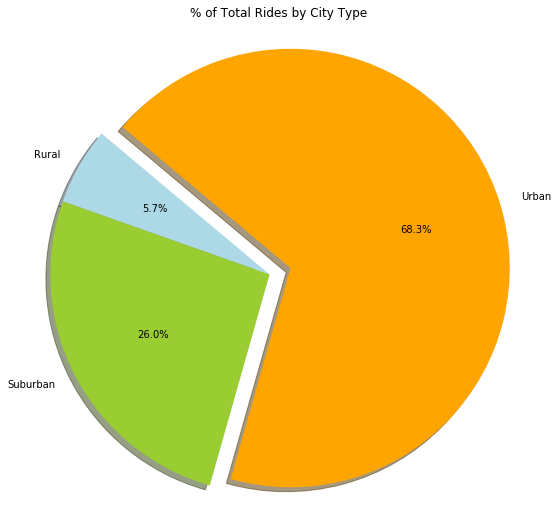

In [298]:
#? % of Total Rides by City Type | How do I turn date or ride_id into objects to tally?
# here I just have a tally of the ride id's, which is not the same as the total # of rides

total_rides = (uber_master.groupby(['type', 'ride_id'], as_index=False).sum()
            .groupby('type')['ride_id'].sum())


explode = (0, 0, 0.1)
colors = ["lightblue","yellowgreen","orange"]

pie_chart2 = total_rides.plot(y="City Type", kind='pie', explode=explode, colors=colors, figsize=(9,9), autopct="%1.1f%%", shadow=True, startangle=140, title ="% of Total Rides by City Type ")
pie_chart2.set_ylabel(" ")
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.show

<function matplotlib.pyplot.show>

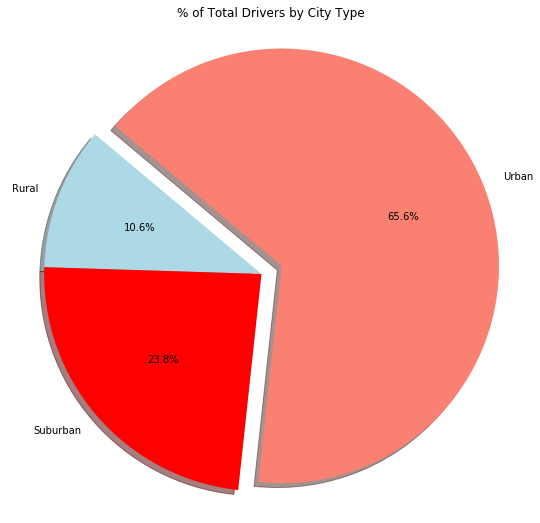

In [295]:
#? % of Total Drivers by City Type | How do I tally the mean number of drivers per city? 
#Did the mean of the group take the mean of each city, thereby not overcounting the # of drivers, which is what would happen if you tallied the total # of drivers in the data set?

explode = (0, 0, 0.1)
colors = ["lightblue","red","salmon"]

total_drivers = (uber_master.groupby(['type', 'driver_count'], as_index=False).sum()
            .groupby('type')['driver_count'].mean())

pie_chart3 = total_drivers.plot(y="City Type", kind='pie', explode=explode, colors=colors, figsize=(9,9), autopct="%1.1f%%", shadow=True, startangle=140, title ="% of Total Drivers by City Type ")
pie_chart3.set_ylabel(" ")
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt. show